https://github.com/RichardKCho/info2950final.git

#### Data analysis questions:
Which stats (hp, attack, defense, sp.attack, sp.defense, speed), types, and generations are correlated with given tiers (OU, UU, RU, PU, NU)? After identifying a correlation, how can we use specific stats to determine a new pokemon's tier ranking?

#### What are the observations (rows) and the attributes (columns)?
Rows: pokemon names

Columns: type1, type2, hp, attack, defense, sp.attack, sp.defense, speed, total, average, generation, usage rate, tier

#### Why was this dataset created?
This dataset was created to keep track of how often (in percentage) certain pokemon were used in competitive pokemon battles. The dataset was organized so that users could easily see which pokemon were overused (good), poor-used (bad), and in between.

#### Who funded the creation of the dataset?
Smogon, a competitive pokemon site featuring analyses, articles, and popular forums. They would want this dataset created in order to have more pokemon players use the website for their needs in competitive play.

#### What processes might have influenced what data was observed and recorded and what was not? 
This particular dataset was trying to measure the frequency at which pokemon are used. Therefore, when the data was collected, it collected raw usage and percent usage, along with the pokemon names. Although pokemon stats and moves are largely relevant in competitive play, it was not directly used in collecting usage percentage, therefore it was not recorded. Moreover, this data was collected from the top players in competitive Pokemon play, and therefore are most representative of what the best players use in each tier.

#### What preprocessing was done, and how did the data come to be in the form that you are using? 
First, pokemon in each tier that were used less than 0.00001% were eliminated, as they would be recorded as used 0.00000%. Some pokemon were also listed as "Type:Null" and were therefore removed from the dataset. Additionally, the stats dataset with all pokemon was merged with the tiered dataset to include statistical information on the different pokemon -- all pokemon that were not in the original dataset or showed up more than once were removed.

#### Potential problems with the dataset.
One potential problem with the dataset is that pokemon are listed in multiple tiers because of how Smogon allows competitive players to play lower-tiered pokemon in higher tiers -- for example, Venusaur exists in the UU tier, but is sometimes used in the OU tier of gameplay as a surprise pick. Moreover, lesser evolved and weaker Pokemon (ie. Bulbasaur) are listed in several tiers of gameplay, we have currently left them in to gauge their impact as an outlier, and to understand the extent to which stats play a factor in a Pokemon's usage rate in competitive play.

#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for? 
N/A

#### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).
https://www.smogon.com/stats/2020-04/?fbclid=IwAR2L5meKdsTH0Hx-uoPIcq_X-N8f899xK0u_IPkhkYMX01xvK9MiXWwfOq4

In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

In [3]:
data = pd.read_csv("pokemon_gen_1_to_8.csv")
pok = pd.DataFrame(data)
pok.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,87.50,1
3,3,Venusaur (Mega Venusaur),Grass,Poison,80,100,123,122,120,80,625,104.17,1
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,51.50,1


In [4]:
#creating a list for OU Pokemon
ou = pd.read_csv("gen8_ou.csv")
ou.columns = ["Name", "Usage Rate"]
tier = "OU"
ou["Tier"] = tier
#for col in ou.columns:
 #   print(col)
ou_merge = pok.merge(ou)
ou_merge

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1,0.00850%,OU
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,0.00020%,OU
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,87.50,1,1.85513%,OU
3,4,Charmander,Fire,NaN,39,52,43,60,50,65,309,51.50,1,0.00001%,OU
4,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,405,67.50,1,0.00013%,OU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,882,Dracovish,Water,Dragon,90,90,100,70,80,75,505,84.17,8,15.58086%,OU
325,883,Arctovish,Water,Ice,90,90,100,80,90,55,505,84.17,8,0.01585%,OU
326,884,Duraludon,Steel,Dragon,70,95,115,120,50,85,535,89.17,8,0.09644%,OU
327,886,Drakloak,Dragon,Ghost,68,80,50,60,50,102,410,68.33,8,0.00001%,OU


In [5]:
#creating a list for UU Pokemon
uu = pd.read_csv("gen8_uu.csv")
uu.columns = ["Name", "Usage Rate"]
tier = "UU"
uu["Tier"] = tier
uu_merge = pok.merge(uu)
uu_merge

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,0.04553%,UU
1,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,87.50,1,6.07078%,UU
2,6,Charizard,Fire,Flying,78,84,78,109,85,100,534,89.00,1,0.57949%,UU
3,8,Wartortle,Water,NaN,59,63,80,65,80,58,405,67.50,1,0.00622%,UU
4,9,Blastoise,Water,NaN,79,83,100,85,105,78,530,88.33,1,3.01063%,UU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,879,Copperajah,Steel,NaN,122,130,69,80,69,30,500,83.33,8,2.50127%,UU
240,881,Arctozolt,Electric,Ice,90,100,90,90,80,55,505,84.17,8,0.01599%,UU
241,883,Arctovish,Water,Ice,90,90,100,80,90,55,505,84.17,8,0.00819%,UU
242,884,Duraludon,Steel,Dragon,70,95,115,120,50,85,535,89.17,8,3.09772%,UU


In [6]:
#creating a list for RU Pokemon
ru = pd.read_csv("gen8_ru.csv")
ru.columns = ["Name", "Usage Rate"]
tier = "RU"
ru["Tier"] = tier
ru_merge = pok.merge(ru)
ru_merge

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1,0.00025%,RU
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,0.15707%,RU
2,6,Charizard,Fire,Flying,78,84,78,109,85,100,534,89.00,1,16.40012%,RU
3,8,Wartortle,Water,NaN,59,63,80,65,80,58,405,67.50,1,1.47330%,RU
4,12,Butterfree,Bug,Flying,60,45,50,90,80,70,395,65.83,1,0.10416%,RU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,877,Morpeko,Electric,Dark,58,95,58,70,58,97,436,72.67,8,6.00128%,RU
219,879,Copperajah,Steel,NaN,122,130,69,80,69,30,500,83.33,8,15.06932%,RU
220,881,Arctozolt,Electric,Ice,90,100,90,90,80,55,505,84.17,8,0.49840%,RU
221,883,Arctovish,Water,Ice,90,90,100,80,90,55,505,84.17,8,0.82586%,RU


In [7]:
#creating a list for NU Pokemon
nu = pd.read_csv("gen8_nu.csv")
nu.columns = ["Name", "Usage Rate"]
tier = "NU"
nu["Tier"] = tier
nu_merge = pok.merge(nu)
nu_merge

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1,0.00025%,NU
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,1.87055%,NU
2,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,405,67.50,1,0.00283%,NU
3,8,Wartortle,Water,NaN,59,63,80,65,80,58,405,67.50,1,0.12936%,NU
4,12,Butterfree,Bug,Flying,60,45,50,90,80,70,395,65.83,1,3.84170%,NU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,871,Pincurchin,Electric,NaN,48,101,95,91,85,15,435,72.50,8,0.10565%,NU
218,874,Stonjourner,Rock,NaN,100,125,135,20,20,70,470,78.33,8,1.02128%,NU
219,881,Arctozolt,Electric,Ice,90,100,90,90,80,55,505,84.17,8,0.44822%,NU
220,883,Arctovish,Water,Ice,90,90,100,80,90,55,505,84.17,8,5.29169%,NU


In [8]:
#creating a list for PU Pokemon
pu = pd.read_csv("gen8_pu.csv")
pu.columns = ["Name", "Usage Rate"]
tier = "PU"
pu["Tier"] = tier
pu_merge = pok.merge(pu)
pu_merge

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,1.44871%,PU
1,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,405,67.50,1,0.14623%,PU
2,7,Squirtle,Water,NaN,44,48,65,50,64,43,314,52.33,1,0.00001%,PU
3,8,Wartortle,Water,NaN,59,63,80,65,80,58,405,67.50,1,1.70883%,PU
4,25,Pikachu,Electric,NaN,35,55,40,50,50,90,320,53.33,1,6.07391%,PU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,874,Stonjourner,Rock,NaN,100,125,135,20,20,70,470,78.33,8,16.52269%,PU
174,878,Cufant,Steel,NaN,72,80,49,40,49,40,330,55.00,8,0.11456%,PU
175,881,Arctozolt,Electric,Ice,90,100,90,90,80,55,505,84.17,8,0.36365%,PU
176,883,Arctovish,Water,Ice,90,90,100,80,90,55,505,84.17,8,0.60533%,PU


In [9]:
#creating a singular DataFrame with all tiers
new_df = pd.concat([ou, uu, ru, nu, pu], axis=0)
#print(len(new_df))

#filtering out the "Type:Null" Pokemon
new_df[~new_df.Name.str.contains("Type: Null")]
#print(len(new_df))

,Name,Usage Rate,Tier
0,Clefable,56.53422%,OU
1,Corviknight,31.22480%,OU
2,Toxapex,28.25718%,OU
3,Hippowdon,25.68515%,OU
4,Ferrothorn,25.17680%,OU
...,...,...,...
202,Wailmer,0.00001%,PU
203,Pidove,0.00001%,PU
204,Squirtle,0.00001%,PU
205,Wooloo,0.00001%,PU


In [10]:
#merging the Pokemon stats data with their usage rate and tier
merged = pok.merge(new_df)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(merged)
  #  print(len(merged))

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Total,Average,Generation,Usage Rate,Tier
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1,0.00850%,OU
1,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1,0.00025%,RU
2,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,53.00,1,0.00025%,NU
3,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,0.00020%,OU
4,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,0.04553%,UU
5,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,0.15707%,RU
6,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,1.87055%,NU
7,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,67.50,1,1.44871%,PU
8,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,87.50,1,1.85513%,OU
9,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,87.50,1,6.07078%,UU


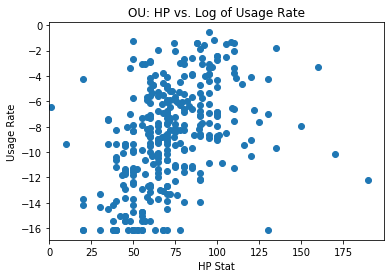

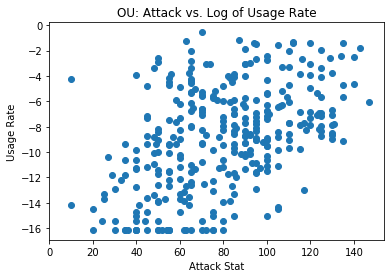

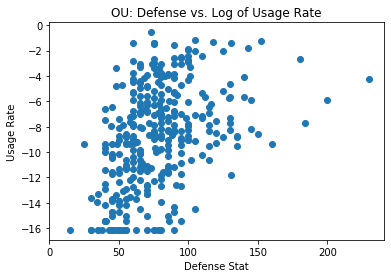

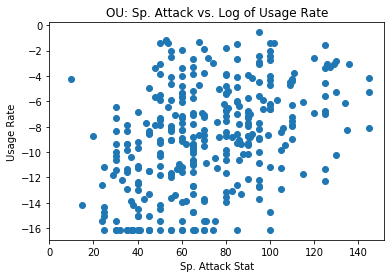

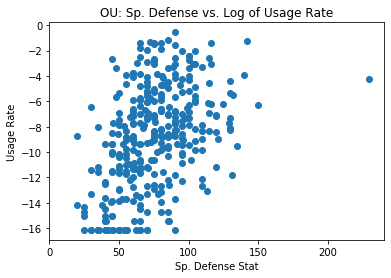

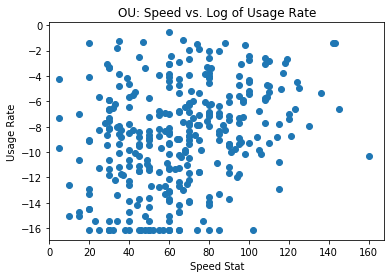

In [103]:
#OU Graphs: Log of Usage Rates are taken because the values are very small
ou_hp = ou_merge["HP"]
ou_atk = ou_merge["Attack"]
ou_def = ou_merge["Defense"]
ou_spatk = ou_merge["Sp. Attack"]
ou_spdef = ou_merge["Sp. Defense"]
ou_spd = ou_merge["Speed"]

log_use = np.log(ou_merge["Usage Rate"])

plt.scatter(ou_hp,log_use)
plt.title("OU: HP vs. Log of Usage Rate")
plt.xlabel("HP Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ou_atk,log_use)
plt.title("OU: Attack vs. Log of Usage Rate")
plt.xlabel("Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ou_def,log_use)
plt.title("OU: Defense vs. Log of Usage Rate")
plt.xlabel("Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ou_spatk,log_use)
plt.title("OU: Sp. Attack vs. Log of Usage Rate")
plt.xlabel("Sp. Attack Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ou_spdef,log_use)
plt.title("OU: Sp. Defense vs. Log of Usage Rate")
plt.xlabel("Sp. Defense Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

plt.scatter(ou_spd,log_use)
plt.title("OU: Speed vs. Log of Usage Rate")
plt.xlabel("Speed Stat")
plt.ylabel("Usage Rate")
plt.xlim(0,)
plt.show()

In [135]:
#Regression analysis to see the correlation between specific stats and usage rate within the OU tier
reg_hp = LinearRegression().fit(ou_merge[["HP"]], ou_merge[["Usage Rate"]])
print("The correlation coefficienct of HP and OU Usage Rate is", float(np.corrcoef(ou_hp, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of HP and the OU Usage Rate is", float(reg_hp.coef_))
print("The Spearman Coefficient of HP and the OU Usage Rate is", spearmanr(ou_hp, ou_merge["Usage Rate"]).correlation)

reg_atk = LinearRegression().fit(ou_merge[["Attack"]], ou_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Attack and OU Usage Rate is", float(np.corrcoef(ou_atk, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of Attack and the OU Usage Rate is", float(reg_atk.coef_))
print("The Spearman Coefficient of Attack and the OU Usage Rate is", spearmanr(ou_atk, ou_merge["Usage Rate"]).correlation)

reg_def = LinearRegression().fit(ou_merge[["Defense"]], ou_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Defense and OU Usage Rate is", float(np.corrcoef(ou_def, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of Defense and the OU Usage Rate is", float(reg_def.coef_))
print("The Spearman Coefficient of Defense and the OU Usage Rate is", spearmanr(ou_def, ou_merge["Usage Rate"]).correlation)

reg_spatk = LinearRegression().fit(ou_merge[["Sp. Attack"]], ou_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Attack and OU Usage Rate is", float(np.corrcoef(ou_spatk, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Attack and the OU Usage Rate is", float(reg_spatk.coef_))
print("The Spearman Coefficient of Sp. Attack and the OU Usage Rate is", spearmanr(ou_spatk, ou_merge["Usage Rate"]).correlation)

reg_spdef = LinearRegression().fit(ou_merge[["Sp. Defense"]], ou_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Sp. Defense and OU Usage Rate is", float(np.corrcoef(ou_spdef, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of Sp. Defense and the OU Usage Rate is", float(reg_spdef.coef_))
print("The Spearman Coefficient of Sp. Defense and the OU Usage Rate is", spearmanr(ou_spdef, ou_merge["Usage Rate"]).correlation)

reg_spd = LinearRegression().fit(ou_merge[["Speed"]], ou_merge[["Usage Rate"]])
print("\nThe correlation coefficienct of Speed and OU Usage Rate is", float(np.corrcoef(ou_spd, ou_merge["Usage Rate"])[0][1]))
print("The regression slope of Speed and the OU Usage Rate is", float(reg_spd.coef_))
print("The Spearman Coefficient of Speed and the OU Usage Rate is", spearmanr(ou_spd, ou_merge["Usage Rate"]).correlation)

The correlation coefficienct of HP and OU Usage Rate is 0.2106330355894118
The regression slope of HP and the OU Usage Rate is 0.0004626390818416177
The Spearman Coefficient of HP and the OU Usage Rate is 0.5000234697612004

The correlation coefficienct of Attack and OU Usage Rate is 0.17063763238818813
The regression slope of Attack and the OU Usage Rate is 0.00032914325818425745
The Spearman Coefficient of Attack and the OU Usage Rate is 0.46753865391809873

The correlation coefficienct of Defense and OU Usage Rate is 0.18121482269936845
The regression slope of Defense and the OU Usage Rate is 0.0003416483244822835
The Spearman Coefficient of Defense and the OU Usage Rate is 0.45878598218647265

The correlation coefficienct of Sp. Attack and OU Usage Rate is 0.1057332343145886
The regression slope of Sp. Attack and the OU Usage Rate is 0.00021117082523685249
The Spearman Coefficient of Sp. Attack and the OU Usage Rate is 0.39719373743296804

The correlation coefficienct of Sp. Defens